# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [67]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 4.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
✔ Download and install

In [68]:
!pip install plotly


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


## Importing the necessary libraries

In [69]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [70]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [71]:
# Import the first file - True.csv
true_df = pd.read_csv('True.csv')
# Import the second file - Fake.csv
fake_df = pd.read_csv('Fake.csv')


## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [72]:
# Inspect the DataFrame with True News to understand the given data
true_df.head(5)  # Display the first 5 rows of the true news DataFrame  

,title,text,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017"


In [73]:
# Inspect the DataFrame with Fake News to understand the given data
fake_df.head(5)  # Display the first 5 rows of the fake news DataFrame

,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017"


In [74]:
# Print the column details for True News DataFrame
print("True News DataFrame Columns:")
print(true_df.columns)


True News DataFrame Columns:
Index(['title', 'text', 'date'], dtype='object')


In [75]:
# Print the column details for Fake News Dataframe
print("Fake News DataFrame Columns:")
print(fake_df.columns)

Fake News DataFrame Columns:
Index(['title', 'text', 'date'], dtype='object')


In [76]:
# Print the column names of both DataFrames
print("True News DataFrame Columns:", true_df.columns.tolist())
print("Fake News DataFrame Columns:", fake_df.columns.tolist())

True News DataFrame Columns: ['title', 'text', 'date']
Fake News DataFrame Columns: ['title', 'text', 'date']


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [77]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_df['news_label'] = 1  # Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_df['news_label'] = 0  # Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake


### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [78]:
# Combine the true and fake news DataFrames into a single DataFrame
combined_df = pd.concat([true_df, fake_df], ignore_index=True)

In [79]:
# Display the first 5 rows of the combined DataFrame to verify the result
combined_df.head(5)  # Display the first 5 rows of the combined DataFrame

,title,text,date,news_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",1


### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [80]:
# Check Presence of Null Values
# Check for null values in the combined DataFrame
print("Combined DataFrame Null Values:")
print(combined_df.isnull().sum())

Combined DataFrame Null Values:
title         21
text          21
date          42
news_label     0
dtype: int64


In [81]:
# Handle Rows with Null Values
# Drop rows with null values in the 'text' column
combined_df = combined_df.dropna(subset=['text'])
# Display the shape of the combined DataFrame after dropping null values
print("Shape of Combined DataFrame after dropping null values:", combined_df.shape) 
# Display the first 5 rows of the cleaned combined DataFrame
combined_df.head(5)  # Display the first 5 rows of the cleaned combined Data

Shape of Combined DataFrame after dropping null values: (44919, 4)


,title,text,date,news_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",1


In [82]:
# drop the null values from date column
combined_df = combined_df.dropna(subset=['date'])  # Uncomment if 'date' column exists and you want to drop null values from it   

In [83]:
print(combined_df.isnull().sum())

title         0
text          0
date          0
news_label    0
dtype: int64


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [84]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
combined_df['news_text'] = combined_df['title'] + ' ' + combined_df['text']  # Combine 'title' and 'text' columns into 'news_text'
# Drop the irrelevant columns from the DataFrame as they are no longer needed
combined_df = combined_df.drop(columns=['title', 'text'])

# Display the first 5 rows of the updated DataFrame to check the result
combined_df.head(5)


,date,news_label,news_text
0,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t..."
1,"December 29, 2017",1,U.S. military to accept transgender recruits o...
2,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,"December 30, 2017",1,FBI Russia probe helped by Australian diplomat...
4,"December 29, 2017",1,Trump wants Postal Service to charge 'much mor...


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [85]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = combined_df[['news_text', 'date', 'news_label']].copy()  # Create a new DataFrame with relevant columns
# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = combined_df['news_label']  # Uncomment if you want to keep the 'news_label' column in df_clean

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [86]:
# Write the function here to clean the text and remove all the unnecessary elements
def clean_text(text):
    # Convert to lower case
    text = text.lower()
    
    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove words with numbers
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    
    return text



#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [87]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['cleaned_news_text'] = df_clean['news_text'].apply(clean_text)  # Apply the clean_text function to 'news_text' column and store the result in 'cleaned_news_text'


### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [88]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags



def lemmatize_texts(texts):
    results = []
    for doc in nlp.pipe(texts, batch_size=50):
        lemmas = [token.lemma_ for token in doc if token.pos_ == "NOUN" and not token.is_stop]
        results.append(" ".join(lemmas))
    return results

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [89]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
df_clean['lemmatized_news_text'] = lemmatize_texts(df_clean['cleaned_news_text'].tolist())
print(df_clean[['cleaned_news_text', 'lemmatized_news_text']].head())

                                   cleaned_news_text  \
0  as us budget fight looms republicans flip thei...   
1  us military to accept transgender recruits on ...   
2  senior us republican senator let mr mueller do...   
3  fbi russia probe helped by australian diplomat...   
4  trump wants postal service to charge much more...   

                                lemmatized_news_text  
0  budget fight script head faction month expansi...  
1  military transgender recruit people time milit...  
2  mueller job counsel investigation link electio...  
3  probe diplomat trump campaign adviser diplomat...  
4  trump service service ship package amzno fight...  


### Save the Cleaned data as a csv file (Recommended)

In [131]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [132]:
# Check the first few rows of the DataFrame
df_clean.head()

,news_text,date,news_label,cleaned_news_text,lemmatized_news_text
0,"As U.S. budget fight looms, Republicans flip t...","December 31, 2017",1,as us budget fight looms republicans flip thei...,budget fight script head faction month expansi...
1,U.S. military to accept transgender recruits o...,"December 29, 2017",1,us military to accept transgender recruits on ...,military transgender recruit people time milit...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,"December 31, 2017",1,senior us republican senator let mr mueller do...,mueller job counsel investigation link electio...
3,FBI Russia probe helped by Australian diplomat...,"December 30, 2017",1,fbi russia probe helped by australian diplomat...,probe diplomat trump campaign adviser diplomat...
4,Trump wants Postal Service to charge 'much mor...,"December 29, 2017",1,trump wants postal service to charge much more...,trump service service ship package amzno fight...


In [133]:
# Check the dimensions of the DataFrame
print("Shape of df_clean DataFrame:", df_clean.shape)  # Print the shape of the df_clean DataFrame

Shape of df_clean DataFrame: (44898, 5)


In [134]:
# Check the number of non-null entries and data types of each column
print("DataFrame Info:")
print(df_clean.info())  # Print the DataFrame information including non-null counts and data types  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   news_text             44898 non-null  object
 1   date                  44898 non-null  object
 2   news_label            44898 non-null  int64 
 3   cleaned_news_text     44898 non-null  object
 4   lemmatized_news_text  44882 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [135]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting the dataset
train_df, val_df = train_test_split(df_clean, test_size=0.3, random_state=42, stratify=df_clean['news_label'])  # Split the DataFrame into training and validation sets with stratification based on 'news_label'
# Display the first few rows of the training DataFrame
train_df.head()  # Display the first few rows of the training DataFrame

,news_text,date,news_label,cleaned_news_text,lemmatized_news_text
32218,FANTASTIC! TRUMP BUDGET DIRECTOR Rips Into Rep...,"May 24, 2017",0,fantastic trump budget director rips into repo...,trump budget director rip reporter thing admin...
24542,Trump Just Got Ripped To SHREDS After Blaming...,"January 7, 2017",0,trump just got ripped to shreds after blaming...,trump shred democrat election hack tweet disda...
38058,GLOBAL CLIMATE CHANGE LIARS Ignore Truth About...,"Apr 22, 2016",0,global climate change liars ignore truth about...,climate change liar truth earth day founder gi...
40508,WILL VILE LEFTISTS Turn Democrats Away?…WATCH ...,"Feb 24, 2017",0,will vile leftists turn democrats away…watch a...,leftist leftist prayer group prolife college s...
11158,No-confidence vote against Pennsylvania approv...,"January 20, 2016",1,noconfidence vote against pennsylvania approve...,noconfidence corruption probe city resolution ...


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [139]:
df_clean['lemmatized_news_text']

0        budget fight script head faction month expansi...
1        military transgender recruit people time milit...
2        mueller job counsel investigation link electio...
3        probe diplomat trump campaign adviser diplomat...
4        trump service service ship package amzno fight...
                               ...                        
44893    sailor century wire week mishap vessel water h...
44894    email privacy classaction lawyer user century ...
44895    zone plan booty century world nonjihadist rebe...
44896    century wire history failure broadcast medium ...
44897    sailor military sign stunt century wire year h...
Name: lemmatized_news_text, Length: 44898, dtype: object

In [141]:
# Add a new column to calculate the character length of cleaned news text
df_clean['cleaned_text_length'] = df_clean['cleaned_news_text'].apply(len)  # Add a new column to calculate the character length of cleaned news text
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_clean['lemmatized_text_length'] = df_clean['lemmatized_news_text'].fillna("").apply(len)


##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

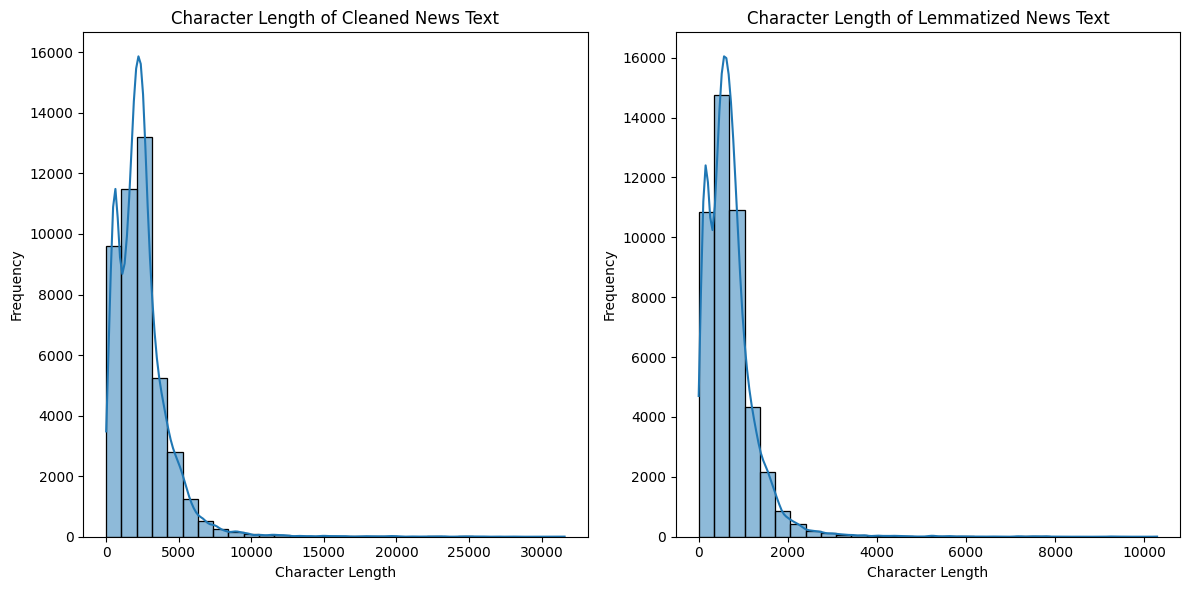

In [142]:
# Create a histogram plot to visualise character lengths
plt.figure(figsize=(12, 6))  # Set the figure size for the plot
# Add histogram for cleaned news text
plt.subplot(1, 2, 1)  # Create a subplot for cleaned news text
sns.histplot(df_clean['cleaned_text_length'], bins=30, kde=True)
plt.title('Character Length of Cleaned News Text')  # Set the title for the cleaned news text histogram
plt.xlabel('Character Length')  # Set the x-axis label for the cleaned news text histogram
plt.ylabel('Frequency')  # Set the y-axis label for the cleaned news
# Add histogram for lemmatized news text with POS tags removed
plt.subplot(1, 2, 2)  # Create a subplot for lemmatized news text
sns.histplot(df_clean['lemmatized_text_length'], bins=30, kde=True)
plt.title('Character Length of Lemmatized News Text')  # Set the title for the lemmatized news text histogram
plt.xlabel('Character Length')  # Set the x-axis label for the lemmatized news text histogram
plt.ylabel('Frequency')  # Set the y-axis label for the lemmatized news text histogram
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()  # Display the plot

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

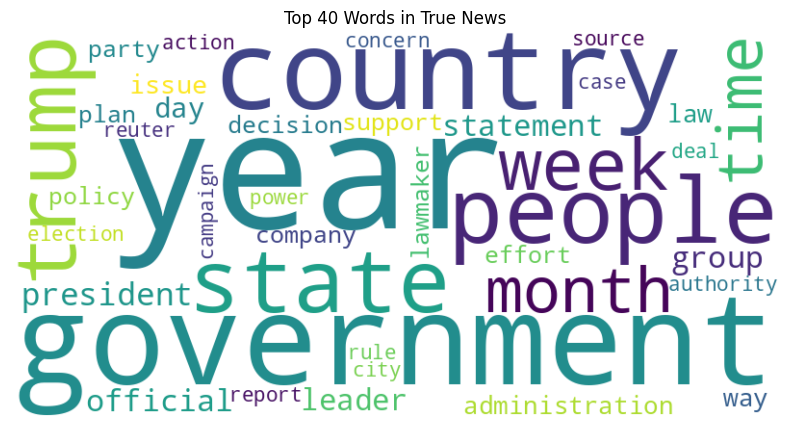

In [144]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from wordcloud import WordCloud  # Import WordCloud for generating word clouds
# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news_text = df_clean[df_clean['news_label'] == 1]['lemmatized_news_text'].fillna("").astype(str)
# Join all the text into a single string
true_news_text = " ".join(true_news_text)
# Generate word cloud for True News
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=40).generate(true_news_text)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News')
plt.show()


##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

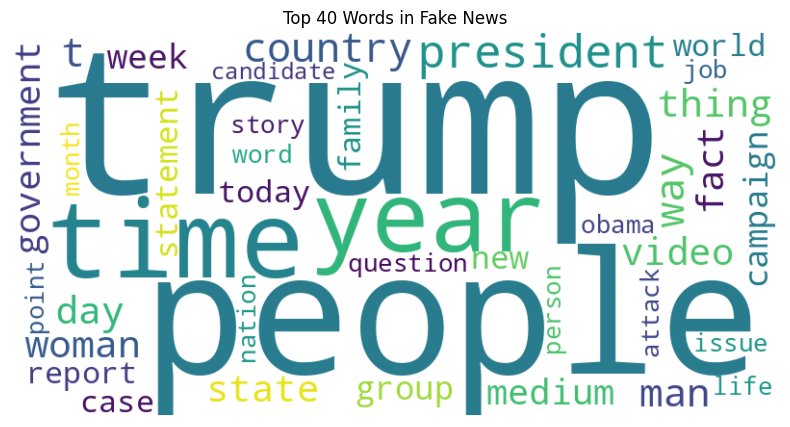

In [145]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text
from wordcloud import WordCloud  # Import WordCloud for generating word clouds
# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news_text = df_clean[df_clean['news_label'] == 0]['lemmatized_news_text'].fillna("").astype(str)
# Join all the text into a single string
fake_news_text = " ".join(fake_news_text)
# Generate word cloud for Fake News
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=40).generate(fake_news_text)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Fake News')
plt.show()


### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [146]:
# Write a function to get the specified top n-grams
def get_top_ngrams(texts, n=1, top_n=10):
    """
    Get the top n-grams from a list of texts.
    
    :param texts: List of strings (texts)
    :param n: The size of the n-grams (1 for unigrams, 2 for bigrams, etc.)
    :param top_n: Number of top n-grams to return
    :return: List of tuples containing the n-grams and their frequencies
    """
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    X = vectorizer.fit_transform(texts)
    ngram_counts = np.asarray(X.sum(axis=0)).flatten()
    ngrams = vectorizer.get_feature_names_out()
    
    # Get the top n-grams
    top_indices = np.argsort(ngram_counts)[::-1][:top_n]
    return [(ngrams[i], ngram_counts[i]) for i in top_indices]

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [147]:
# Handle NaN values in the text data
df_clean['lemmatized_news_text'] = df_clean['lemmatized_news_text'].fillna("")  # Fill NaN values with empty strings

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in True News:
[('trump', 35781),
 ('state', 20576),
 ('government', 19711),
 ('year', 18966),
 ('people', 15349),
 ('election', 14304),
 ('country', 14086),
 ('official', 13292),
 ('party', 11911),
 ('campaign', 11137)]


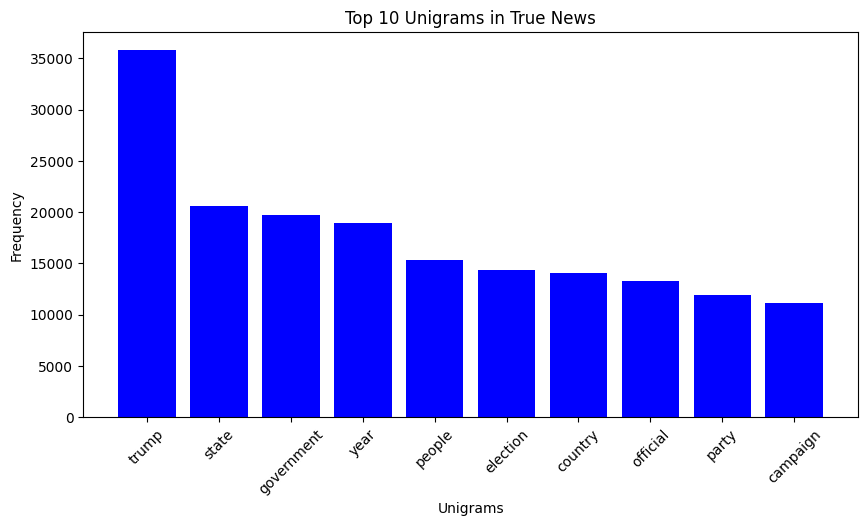

In [157]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
top_unigrams_true = get_top_ngrams(df_clean[df_clean['news_label'] == 1]['lemmatized_news_text'], n=1, top_n=10)
print("Top 10 Unigrams in True News:")
pprint(top_unigrams_true)  # Pretty print the top unigrams in true news
# Plot the top 10 unigrams in true news using a bar graph
unigrams, counts = zip(*top_unigrams_true)  # Unzip the n-grams and their counts
plt.figure(figsize=(10, 5))  # Set the figure size
plt.bar(unigrams, counts, color='blue')  # Create a bar graph for the top unigrams
plt.title('Top 10 Unigrams in True News')  # Set the title for the plot
plt.xlabel('Unigrams')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in True News:
[('trump campaign', 1736),
 ('news conference', 1378),
 ('percent percent', 1124),
 ('request comment', 1036),
 ('tax reform', 1022),
 ('climate change', 1020),
 ('security force', 1004),
 ('trump administration', 952),
 ('intelligence agency', 924),
 ('house representative', 923)]


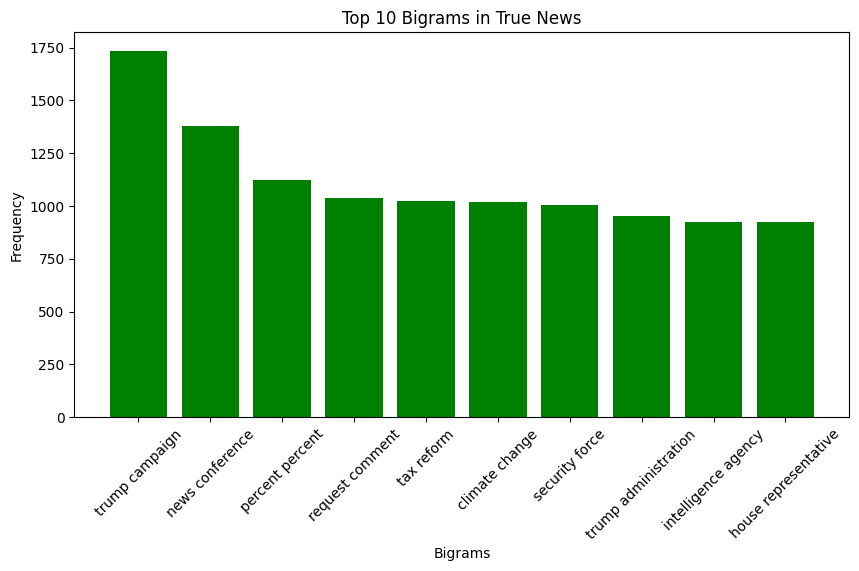

In [158]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top_bigrams_true = get_top_ngrams(df_clean[df_clean['news_label'] == 1]['lemmatized_news_text'], n=2, top_n=10)
print("Top 10 Bigrams in True News:")
pprint(top_bigrams_true)  # Pretty print the top bigrams in true news
# Plot the top 10 bigrams in true news using a bar graph
bigrams, counts = zip(*top_bigrams_true)  # Unzip the n-grams and their counts
plt.figure(figsize=(10, 5))  # Set the figure size
plt.bar(bigrams, counts, color='green')  # Create a bar graph for the top bigrams
plt.title('Top 10 Bigrams in True News')  # Set the title for the plot
plt.xlabel('Bigrams')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in True News:
[('official condition anonymity', 335),
 ('trump transition team', 251),
 ('tax rate percent', 243),
 ('staff involvement creation', 180),
 ('involvement creation production', 180),
 ('state department official', 180),
 ('article staff involvement', 180),
 ('rate percent percent', 165),
 ('circuit court appeal', 161),
 ('use email server', 159)]


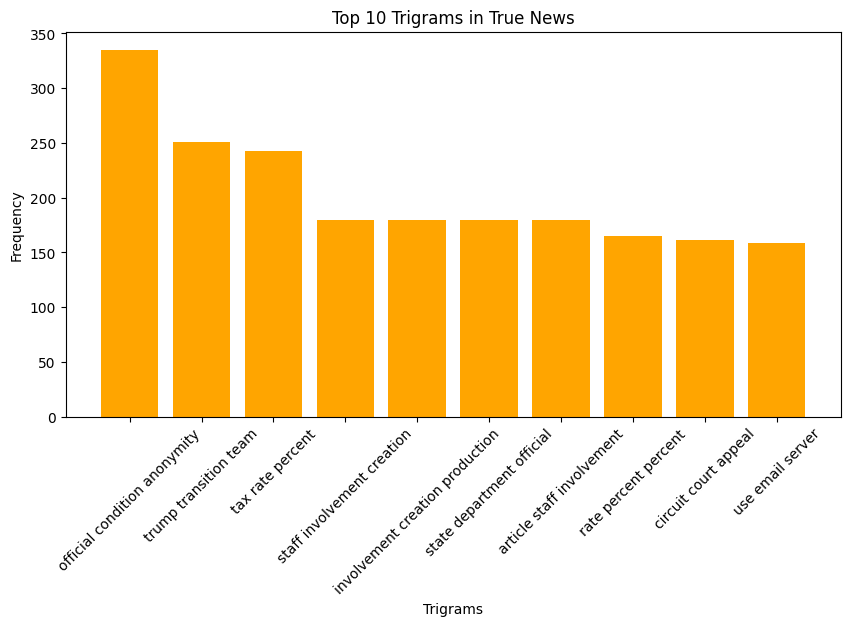

In [159]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
top_trigrams_true = get_top_ngrams(df_clean[df_clean['news_label'] == 1]['lemmatized_news_text'], n=3, top_n=10)
print("Top 10 Trigrams in True News:")
pprint(top_trigrams_true)  # Pretty print the top trigrams in true news
# Plot the top 10 trigrams in true news using a bar graph
trigrams, counts = zip(*top_trigrams_true)  # Unzip the n-grams and their counts
plt.figure(figsize=(10, 5))  # Set the figure size
plt.bar(trigrams, counts, color='orange')  # Create a bar graph for the top trigrams
plt.title('Top 10 Trigrams in True News')  # Set the title for the plot
plt.xlabel('Trigrams')  # Set the x-axis label  
plt.ylabel('Frequency')  # Set the y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in Fake News:
[('trump', 51025),
 ('people', 26318),
 ('time', 16017),
 ('year', 14873),
 ('president', 14795),
 ('image', 13935),
 ('state', 12805),
 ('woman', 11638),
 ('video', 11549),
 ('news', 11183)]


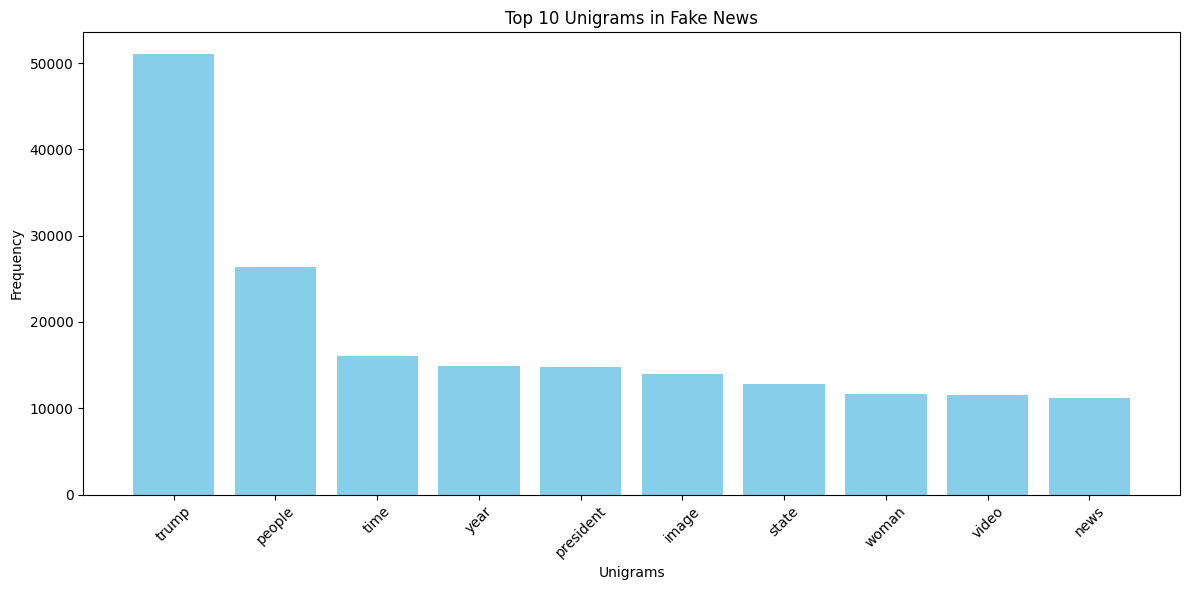

In [156]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
top_unigrams_fake = get_top_ngrams(df_clean[df_clean['news_label'] == 0]['lemmatized_news_text'], n=1, top_n=10)
print("Top 10 Unigrams in Fake News:")
pprint(top_unigrams_fake)  # Pretty print the top unigrams in fake news

# Create a bar plot for top unigrams in fake news
plt.figure(figsize=(12, 6))  # Set the figure size for the plot
plt.bar([x[0] for x in top_unigrams_fake], [x[1] for x in top_unigrams_fake], color='skyblue')
plt.title('Top 10 Unigrams in Fake News')  # Set the title for the unigrams bar plot
plt.xlabel('Unigrams')  # Set the x-axis label for the unigrams bar plot
plt.ylabel('Frequency')  # Set the y-axis label for the unigrams bar plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in Fake News:
[('trump supporter', 2093),
 ('century wire', 1890),
 ('image image', 1846),
 ('police officer', 1699),
 ('trump campaign', 1685),
 ('law enforcement', 1539),
 ('trump realdonaldtrump', 1338),
 ('screen capture', 1331),
 ('donald trump', 1301),
 ('climate change', 1056)]


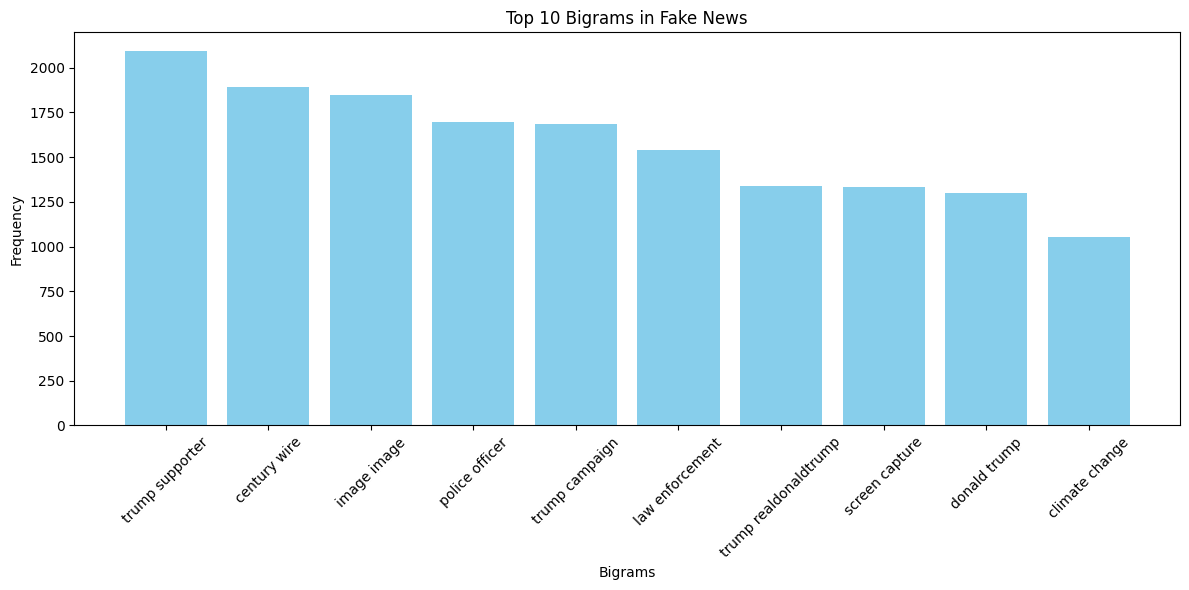

In [155]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top_bigrams_fake = get_top_ngrams(df_clean[df_clean['news_label'] == 0]['lemmatized_news_text'], n=2, top_n=10)
print("Top 10 Bigrams in Fake News:")
pprint(top_bigrams_fake)  # Pretty print the top bigrams in fake news
# plot the bar graph for top bigrams in fake news
plt.figure(figsize=(12, 6))  # Set the figure size for the plot
# Create a bar plot for top bigrams in fake news
plt.bar([x[0] for x in top_bigrams_fake], [x[1] for x in top_bigrams_fake], color='skyblue')
plt.title('Top 10 Bigrams in Fake News')  # Set the title for the bigrams bar plot
plt.xlabel('Bigrams')  # Set the x-axis label for the bigrams bar plot  
plt.ylabel('Frequency')  # Set the y-axis label for the bigrams bar plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in Fake News:
[('news century wire', 905),
 ('video screen capture', 728),
 ('image video screen', 688),
 ('image getty image', 580),
 ('image screen capture', 452),
 ('image chip image', 257),
 ('century wire file', 244),
 ('image video screenshot', 231),
 ('law enforcement officer', 229),
 ('broadcast boiler room', 215)]


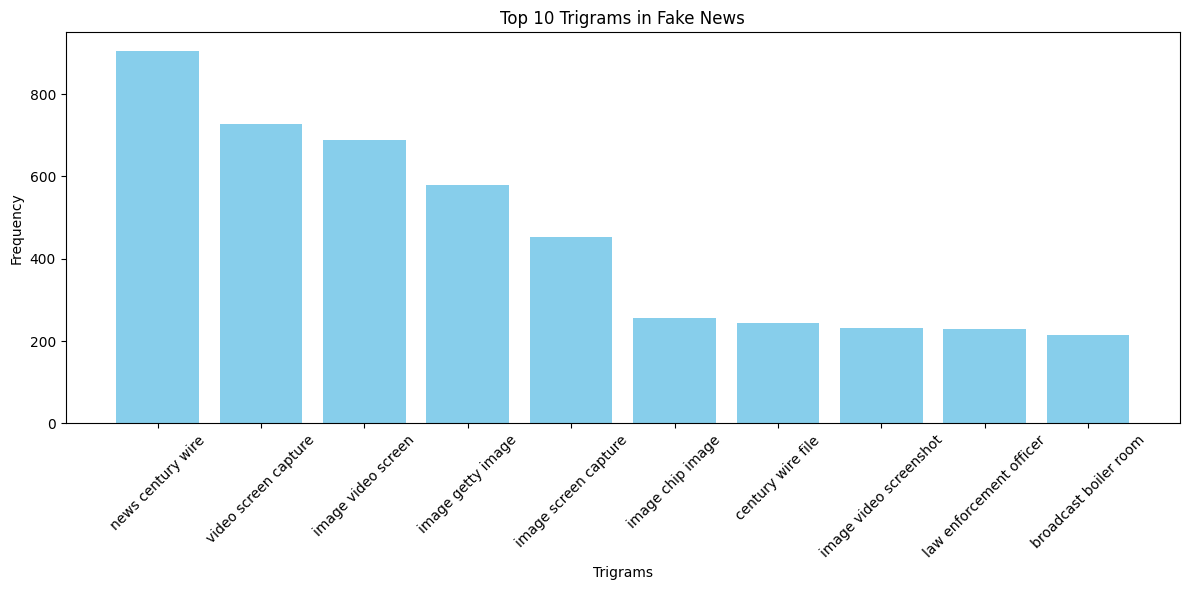

In [160]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top_trigrams_fake = get_top_ngrams(df_clean[df_clean['news_label'] == 0]['lemmatized_news_text'], n=3, top_n=10)
print("Top 10 Trigrams in Fake News:")
pprint(top_trigrams_fake)  # Pretty print the top trigrams in fake news
# Plot the top 10 trigrams in fake news using a bar graph
plt.figure(figsize=(12, 6))  # Set the figure size for the plot
# Create a bar plot for top trigrams in fake news
plt.bar([x[0] for x in top_trigrams_fake], [x[1] for x in top_trigrams_fake], color='skyblue')
plt.title('Top 10 Trigrams in Fake News')  # Set the title for the trigrams bar plot
plt.xlabel('Trigrams')  # Set the x-axis label for the trigrams bar plot
plt.ylabel ('Frequency')  # Set the y-axis label for the trigrams bar plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability  
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [107]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [108]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [109]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [110]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [111]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [112]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [113]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [114]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [115]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [116]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [117]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [118]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [162]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
%pip install --quiet gensim

import gensim.downloader as api  # Import Gensim's downloader API

# Download and load the pre-trained Word2Vec model (Google News vectors)
word2vec_model = api.load("word2vec-google-news-300")


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
[==================================================] 100.0% 1662.8/1662.8MB downloaded


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [172]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data

def get_vector(text, model):
    tokens = text.split()
    vectors = [model[word] for word in tokens if word in model]
    if vectors:
        return np.mean(vectors, axis=0)   # average word vectors
    else:
        return np.zeros(model.vector_size)  # fallback if no tokens in vocab

train_vectors = train_df['news_text'].apply(lambda x: get_vector(x, word2vec_model)).tolist()
val_vectors   = val_df['news_text'].apply(lambda x: get_vector(x, word2vec_model)).tolist()
# Extract the target variable for the training data and validation data
train_target = train_df['news_label']  # Extract the target variable for the training data
# Extract the target variable for the validation data
val_target = val_df['news_label']  # Extract the target variable for the validation data


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [173]:
## Initialise Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)  # Initialise Logistic Regression model with a maximum of 1000 iterations
## Train Logistic Regression model on training data
logistic_model.fit(train_vectors, train_target)  # Train the model using the training vectors and target labels
## Predict on validation data
val_predictions = logistic_model.predict(val_vectors)  # Predict the labels for the validation data


##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [176]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("Logistic Regression Model Performance:")
print("Accuracy:", accuracy_score(val_target, val_predictions))  # Calculate and print accuracy
print("Precision:", precision_score(val_target, val_predictions))  # Calculate and print precision
print("Recall:", recall_score(val_target, val_predictions))  # Calculate and print recall
print("F1 Score:", f1_score(val_target, val_predictions))  # Calculate and print F1 score


Logistic Regression Model Performance:
Accuracy: 0.9789161098737936
Precision: 0.9761203287331369
Recall: 0.9797665369649805
F1 Score: 0.9779400341774118


In [175]:
# Classification Report
print("\nClassification Report:\n", classification_report(val_target, val_predictions))  # Print the classification report for detailed metrics


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      7045
           1       0.98      0.98      0.98      6425

    accuracy                           0.98     13470
   macro avg       0.98      0.98      0.98     13470
weighted avg       0.98      0.98      0.98     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [177]:
## Initialise Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)  # Initialise Decision Tree model with a random state for reproducibility
## Train Decision Tree model on training data
decision_tree_model.fit(train_vectors, train_target)  # Train the Decision Tree model using the training vectors and target labels
## Predict on validation data
val_predictions_tree = decision_tree_model.predict(val_vectors)  # Predict the labels for the validation data using Decision Tree model

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [178]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("Decision Tree Model Performance:")
print("Accuracy:", accuracy_score(val_target, val_predictions_tree))  # Calculate and print accuracy
print("Precision:", precision_score(val_target, val_predictions_tree))  # Calculate and print precision
print("Recall:", recall_score(val_target, val_predictions_tree))  # Calculate and print recall
print("F1 Score:", f1_score(val_target, val_predictions_tree))  # Calculate and print F1 score


Decision Tree Model Performance:
Accuracy: 0.9339272457312546
Precision: 0.9383811183272612
Recall: 0.9220233463035019
F1 Score: 0.930130318731355


In [179]:
# Classification Report
print("\nClassification Report for Decision Tree:\n", classification_report(val_target, val_predictions_tree))  # Print the classification report for Decision Tree model


Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      7045
           1       0.94      0.92      0.93      6425

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [180]:
## Initialise Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)  # Initialise Random Forest model with a random state for reproducibility
## Train Random Forest model on training data
random_forest_model.fit(train_vectors, train_target)  # Train the Random Forest model using the training vectors and target labels
## Predict on validation data
val_predictions_forest = random_forest_model.predict(val_vectors)  # Predict the labels for the validation data using Random Forest model

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [181]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("Random Forest Model Performance:")
print("Accuracy:", accuracy_score(val_target, val_predictions_forest))  # Calculate and print accuracy
print("Precision:", precision_score(val_target, val_predictions_forest))  # Calculate and print precision
print("Recall:", recall_score(val_target, val_predictions_forest))  # Calculate and print recall
print("F1 Score:", f1_score(val_target, val_predictions_forest))  # Calculate and print F1 score


Random Forest Model Performance:
Accuracy: 0.9774313288789903
Precision: 0.9742755307608864
Recall: 0.9785214007782101
F1 Score: 0.9763938499767044


In [182]:
# Classification Report
print("\nClassification Report for Decision Tree:\n", classification_report(val_target, val_predictions_tree))  # Print the classification report for Decision Tree model


Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      7045
           1       0.94      0.92      0.93      6425

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.